### Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans.  
#### Coronaviruses are zoonotic, meaning they are transmitted between animals and people.  Detailed investigations found that SARS-CoV was transmitted from civet cats to humans and MERS-CoV from dromedary camels to humans. Several known coronaviruses are circulating in animals that have not yet infected human.

With the news coming in that the World Health Organization has declared the novel coronavirus outbreak a public health emergency, it has increased the general fear among the public. A lot of countires have heightened their measures to fight with this virus with the condition in China still senitive..More than 20 countries and territories outside of mainland China have confirmed cases of the virus -- spanning Asia, Europe, North America and the Middle East -- as India, Italy and the Philippines reported their first cases on Thursday.

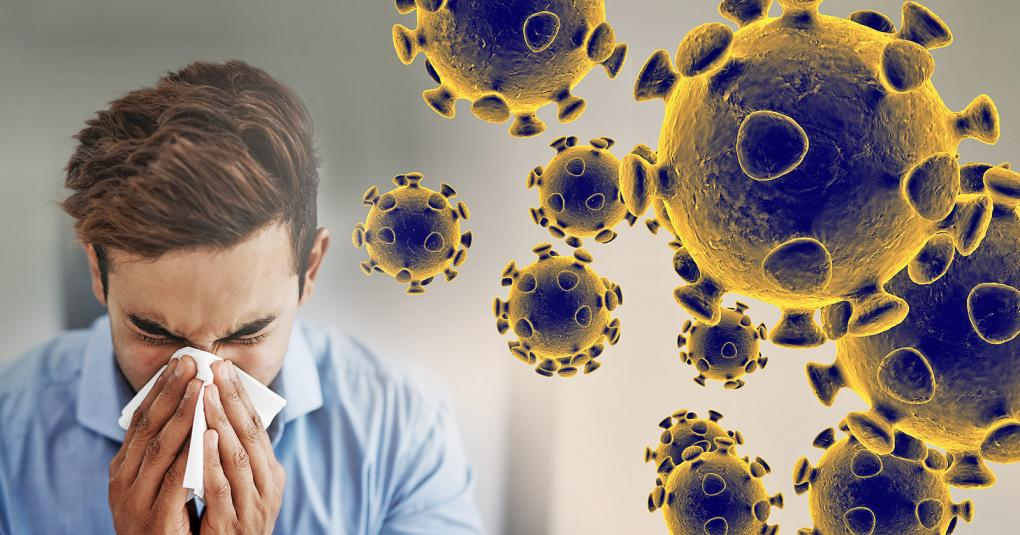

https://www.fda.gov/emergency-preparedness-and-response/mcm-issues/novel-coronavirus-covid-19

### In this notebook I have tried to jot down the basic analysis of Coronavirus learning from various source, Thanks for visiting this notebook. 
#### Your valuable feedback will be appreciated.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import glob
import os
import random

# visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import folium
import plotly as py
import plotly.express as px
import plotly.graph_objs as go

import datetime

# Import DataSet

In [2]:

#NCOV_data = pd.read_csv(r"C:\Code\Novel Coronavirus\novel-corona-virus-2019-dataset/NCOV_data.csv")
#covid_19_data = pd.read_csv(r"C:\Code\Novel Coronavirus\novel-corona-virus-2019-dataset/covid_19_data.csv",parse_dates= True, index_col= 'Sno')
#time_series_covid_19_confirmed = pd.read_csv(r"C:\Code\Novel Coronavirus\novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
#time_series_covid_19_deaths = pd.read_csv(r"C:\Code\Novel Coronavirus\novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
#time_series_covid_19_recovered = pd.read_csv(r"C:\Code\Novel Coronavirus\novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")
#cn_geo_data = (r"C:\Code\Novel Coronavirus\novel-corona-virus-2019-dataset/china.json")
#world_coordinates = pd.read_csv(r"C:\Code\Novel Coronavirus\novel-corona-virus-2019-dataset/world_coordinates.csv", index_col= 'Country')



In [3]:
NCOV_data = pd.read_csv('../input/corona/NCOV_data.csv')
time_series_covid_19_confirmed = pd.read_csv('../input/corona/time_series_covid_19_confirmed.csv')
time_series_covid_19_deaths = pd.read_csv('../input/corona/time_series_covid_19_deaths.csv')
time_series_covid_19_recovered = pd.read_csv('../input/corona/time_series_covid_19_recovered.csv')
world_coordinates = pd.read_csv('../input/corona/world_coordinates.csv')


## <a id='basic'>1. Basic Exploration</a>

In [4]:
NCOV_data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [5]:
NCOV_data.tail()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1714,1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0
1715,1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
1716,1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0
1717,1718,02/17/2020 22:00:00,"Seattle, WA",US,2020-02-09T07:03:04,1.0,0.0,1.0
1718,1719,02/17/2020 22:00:00,"Tempe, AZ",US,2020-02-01T19:43:03,1.0,0.0,0.0


In [6]:
NCOV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 8 columns):
Sno               1719 non-null int64
Date              1719 non-null object
Province/State    1257 non-null object
Country           1719 non-null object
Last Update       1719 non-null object
Confirmed         1719 non-null float64
Deaths            1719 non-null float64
Recovered         1719 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 107.6+ KB


In [7]:
NCOV_data.shape

(1719, 8)

In [8]:
NCOV_data.isnull().sum()

Sno                 0
Date                0
Province/State    462
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

In [9]:
NCOV_data.describe()

,Sno,Confirmed,Deaths,Recovered
count,1719.000000,1719.000000,1719.000000,1719.000000
mean,860.000000,454.596859,10.441536,44.361838
std,496.376873,3712.529032,106.638286,351.078713
min,1.000000,0.000000,0.000000,0.000000
25%,430.500000,2.000000,0.000000,0.000000
50%,860.000000,12.000000,0.000000,0.000000
75%,1289.500000,109.000000,0.000000,7.000000
max,1719.000000,59989.000000,1789.000000,7862.000000


Top Country Affected in this scenario

In [10]:
# Countries affected

countries = NCOV_data['Country'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium', 'Others', 'Egypt']

Total countries affected by virus:  34


In [11]:
#Combining China and Mainland China cases as they are provided separately

NCOV_data['Country'].replace({'Mainland China':'China'},inplace=True)
countries = NCOV_data['Country'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium', 'Others', 'Egypt']

Total countries affected by virus:  33



## <a id='basic'>Let's Fix the datetime</a>

In [12]:
# Convert Last Update column to datetime64 format

from datetime import date

NCOV_data['Date'] = NCOV_data['Date'].apply(pd.to_datetime)
#NCOV_data.drop(['Sno'],axis=1,inplace=True)

#Set Date column as the index column.
#data.set_index('Last Update', inplace=True)
#NCOV_data.head()


d = NCOV_data['Date'][-1:].astype('str')
year = int(d.values[0].split('-')[0])
month = int(d.values[0].split('-')[1])
day = int(d.values[0].split('-')[2].split()[0])


data_latest = NCOV_data[NCOV_data['Date'] > pd.Timestamp(date(year,month,day))]
data_latest.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1644,1645,2020-02-17 22:00:00,Hubei,China,2020-02-17T23:13:06,59989.0,1789.0,7862.0
1645,1646,2020-02-17 22:00:00,Guangdong,China,2020-02-17T12:43:02,1322.0,4.0,524.0
1646,1647,2020-02-17 22:00:00,Henan,China,2020-02-17T14:53:02,1246.0,16.0,509.0
1647,1648,2020-02-17 22:00:00,Zhejiang,China,2020-02-17T11:23:06,1171.0,0.0,507.0
1648,1649,2020-02-17 22:00:00,Hunan,China,2020-02-17T11:43:01,1006.0,3.0,498.0



# <a id='basic'>EDA</a>

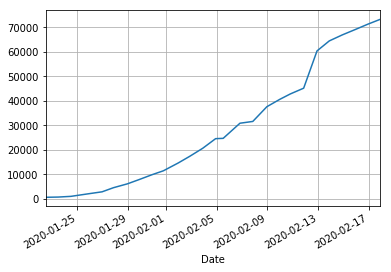

In [13]:
NCOV_data.groupby('Date').sum()['Confirmed'].plot()
plt.grid()

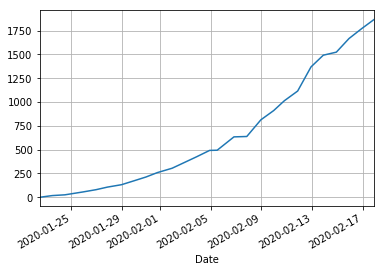

In [14]:
NCOV_data.groupby('Date').sum()['Deaths'].plot()
plt.grid()

In [15]:
country_count = NCOV_data['Country'].value_counts().reset_index()
country_count = country_count.rename(columns={"index": "Country", "Country": "Count"})
country_count.head()

,Country,Count
0,China,835
1,US,188
2,Australia,84
3,Canada,59
4,South Korea,27


In [16]:
country_count = pd.DataFrame(NCOV_data.groupby('Country')['Confirmed'].max()).reset_index()
country_count.head()

,Country,Confirmed
0,Australia,5.0
1,Belgium,1.0
2,Brazil,0.0
3,Cambodia,1.0
4,Canada,5.0


In [17]:
country_count_wo_mc=country_count[country_count.Country != 'Mainland China']
country_count_wo_mc.head()

,Country,Confirmed
0,Australia,5.0
1,Belgium,1.0
2,Brazil,0.0
3,Cambodia,1.0
4,Canada,5.0


In [18]:
plt.figure(figsize=(20,20))
fig = go.Figure(data = [go.Pie(labels = country_count_wo_mc.Country,values = country_count_wo_mc.Confirmed)])
fig.update_layout(title="Country-wise distribution except Mainland China")
fig.show()

<Figure size 1440x1440 with 0 Axes>

In [19]:
state_count = pd.DataFrame(NCOV_data[NCOV_data['Country']=='Mainland China'].groupby('Province/State').max()['Confirmed']).reset_index()
fig = go.Figure(data = [go.Pie(labels = state_count['Province/State'],values = state_count.Confirmed)])
fig.update_layout(title="State-wise distribution of Mainland China")
fig.show()


# <a id='basic'>Growth trend of Corona virus in each Country individually</a>

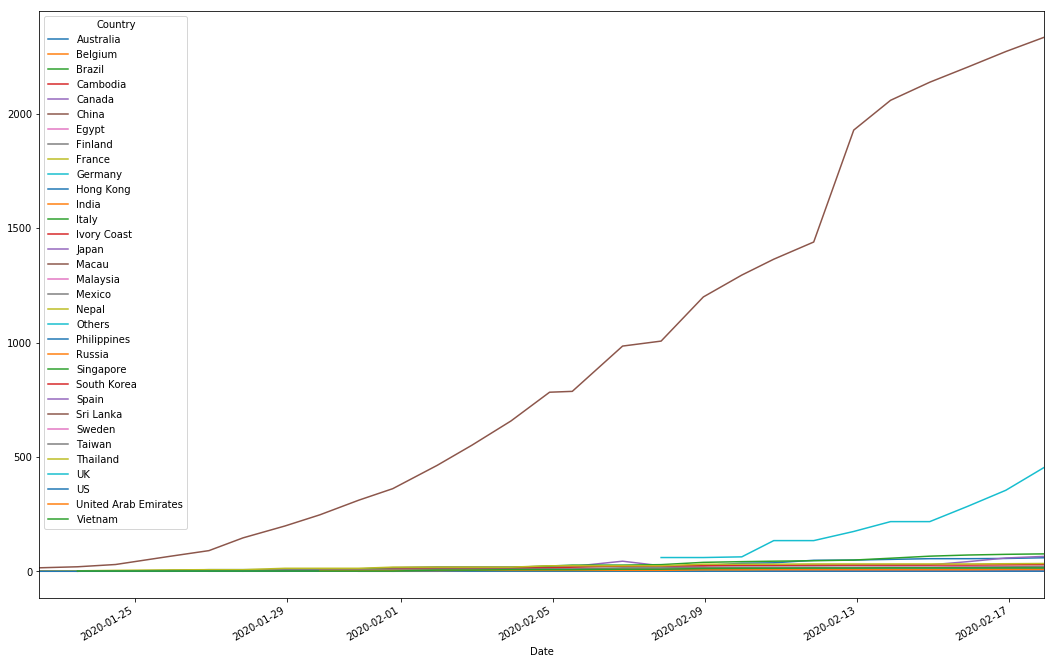

In [20]:

growth_country = pd.pivot_table(NCOV_data[NCOV_data.Country!='Mainland China'], values='Confirmed', columns='Country', index='Date')
growth_country.plot(figsize=(18,12))

In [21]:
# Creating a dataframe with total no of confirmed cases for every country
Number_of_countries = len(data_latest['Country'].value_counts())


cases = pd.DataFrame(data_latest.groupby('Country')['Confirmed'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,Number_of_countries+1)

global_cases = cases[['Country','Confirmed']]


global_cases

,Country,Confirmed
1,Australia,15.0
2,Belgium,1.0
3,Cambodia,1.0
4,Canada,8.0
5,China,72364.0
6,Egypt,1.0
7,Finland,1.0
8,France,12.0
9,Germany,16.0
10,Hong Kong,60.0


In [22]:
# Importing the world_coordinates dataset


# Merging the coordinates dataframe with original dataframe
world_data = pd.merge(world_coordinates,global_cases,on='Country')
world_data.head()

,Code,Country,latitude,longitude,Confirmed
0,AE,United Arab Emirates,23.424076,53.847818,9.0
1,AU,Australia,-25.274398,133.775136,15.0
2,BE,Belgium,50.503887,4.469936,1.0
3,CA,Canada,56.130366,-106.346771,8.0
4,CN,China,35.861660,104.195397,72364.0



# <a id='basic'>Lets visualize where the desease spread geographically</a>

In [23]:
# create map and display it
world_map = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data['latitude'], world_data['longitude'], world_data['Confirmed'], world_data['Country']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
world_map

# <a id='basic'>Checking the data set what we have been imported earlier </a>

In [24]:
time_series_covid_19_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,86,87,90,90,90,90,91,91,91,91


In [25]:
time_series_covid_19_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,4,4,5,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.18238,116.4142,0,0,0,0,0,1,...,3,3,3,3,4,4,4,4,4,4
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,3,3,4,5,5,5,5,5,5,6
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [26]:
time_series_covid_19_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,105,127,157,193,221,255,280,361,413,474
1,Beijing,Mainland China,40.18238,116.4142,0,0,1,2,2,2,...,48,56,69,80,98,108,114,122,145,153
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,79,102,128,152,184,207,225,254,274,299
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,45,53,57,63,71,82,90,93,112,126
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,24,31,39,39,49,54,58,62,65,71


In [27]:
df= pd.read_csv('../input/corona/covid_19_data.csv', parse_dates= True, index_col= 'SNo')

In [28]:
#df= pd.read_csv(r'C:\Code\Novel Coronavirus\novel-corona-virus-2019-dataset\covid_19_data.csv', parse_dates= True, index_col= 'SNo')
df['ObservationDate']= pd.to_datetime(df['ObservationDate']).dt.date
df['Last Update']= pd.to_datetime(df['Last Update']).dt.date
#df.set_index('ObservationDate', inplace= True)
df.head(5)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,2020-01-22,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,2020-01-22,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,2020-01-22,6.0,0.0,0.0
4,2020-01-22,Fujian,Mainland China,2020-01-22,1.0,0.0,0.0
5,2020-01-22,Gansu,Mainland China,2020-01-22,0.0,0.0,0.0


In [29]:
df.shape

(1942, 7)

In [30]:
df.isnull().sum()

ObservationDate      0
Province/State     529
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [31]:
df.describe()

,Confirmed,Deaths,Recovered
count,1942.000000,1942.000000,1942.000000
mean,505.557158,12.294027,63.430484
std,4166.446061,126.464847,524.279199
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,12.000000,0.000000,1.000000
75%,112.000000,0.000000,10.000000
max,62442.000000,2144.000000,11788.000000


In [32]:
df1= df.rename(columns={'Country/Region':'Country'})

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1942 entries, 1 to 1942
Data columns (total 7 columns):
ObservationDate    1942 non-null object
Province/State     1413 non-null object
Country            1942 non-null object
Last Update        1942 non-null object
Confirmed          1942 non-null float64
Deaths             1942 non-null float64
Recovered          1942 non-null float64
dtypes: float64(3), object(4)
memory usage: 121.4+ KB


In [34]:
df1.head()

,ObservationDate,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,2020-01-22,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,2020-01-22,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,2020-01-22,6.0,0.0,0.0
4,2020-01-22,Fujian,Mainland China,2020-01-22,1.0,0.0,0.0
5,2020-01-22,Gansu,Mainland China,2020-01-22,0.0,0.0,0.0


In [35]:
df1['Country'].replace({'Mainland China': 'China'}, inplace= True)
recent_cp_df= df1.groupby(['Country', 'Province/State']).last()
recent_cp_df

ObservationDate Last Update  Confirmed  Deaths  \
Country   Province/State                                                        
Australia New South Wales           2020-02-20  2020-02-13        4.0     0.0   
          Queensland                2020-02-20  2020-02-09        5.0     0.0   
          South Australia           2020-02-20  2020-02-17        2.0     0.0   
          Victoria                  2020-02-20  2020-02-13        4.0     0.0   
Canada    British Columbia          2020-02-20  2020-02-17        5.0     0.0   
...                                        ...         ...        ...     ...   
US        San Diego County, CA      2020-02-20  2020-02-13        2.0     0.0   
          Santa Clara, CA           2020-02-20  2020-02-03        2.0     0.0   
          Seattle, WA               2020-02-20  2020-02-09        1.0     0.0   
          Tempe, AZ                 2020-02-20  2020-02-01        1.0     0.0   
          Washington                2020-01-31  2020-01-31        1.0     0.0   

                                Recovered  
Country   Province/State                   
Australia New South Wales             4.0  
          Queensland                  0.0  
          South Australia             2.0  
          Victoria                    4.0  
Canada    British Columbia            0.0  
...                                   ...  
US        San Diego County, CA        0.0  
          Santa Clara, CA             0.0  
          Seattle, WA                 1.0  
          Tempe, AZ                   0.0  
          Washington                  0.0  

[61 rows x 5 columns]

In [36]:
recent_cp_df_c= recent_cp_df.groupby('Country').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
recent_cp_df_c['Recovery Rate']= recent_cp_df_c['Recovered']/recent_cp_df_c['Confirmed']
recent_cp_df_c['Mortality Rate']= recent_cp_df_c['Deaths']/recent_cp_df_c['Confirmed']
recent_c_df=  df1

for i in recent_cp_df_c.index:
    recent_c_df= recent_c_df[(recent_c_df['Country']!=i)]
    
recent_c_df= recent_c_df.groupby(['Country']).last()
recent_c_df.drop(['Province/State', 'Last Update'], axis= 1, inplace= True)
recent_c_df['Recovery Rate']= recent_c_df['Recovered']/recent_c_df['Confirmed']
recent_c_df['Mortality Rate']= recent_c_df['Deaths']/recent_c_df['Confirmed']

recent_df= pd.concat([recent_cp_df_c, recent_c_df], axis= 0)
recent_df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Confirmed,Deaths,Mortality Rate,ObservationDate,Recovered,Recovery Rate
Country,,,,,,
Australia,15.0,0.0,0.000000,NaN,10.0,0.666667
Canada,11.0,0.0,0.000000,NaN,1.0,0.090909
China,74999.0,2236.0,0.029814,NaN,18002.0,0.240030
Germany,5.0,0.0,0.000000,NaN,0.0,0.000000
Hong Kong,68.0,2.0,0.029412,NaN,6.0,0.088235
Macau,10.0,0.0,0.000000,NaN,6.0,0.600000
Others,695.0,2.0,0.002878,NaN,1.0,0.001439
Taiwan,24.0,1.0,0.041667,NaN,2.0,0.083333
US,22.0,0.0,0.000000,NaN,3.0,0.136364


In [37]:
# We notice NA values for Brazil, Ivory Coast & Mexico. We can drop them since they have no confirmed cases.
#Confirmed vs Deaths vs Recovered for all countries except China
for i in ['Brazil', 'Ivory Coast', 'Mexico']:
    df= df1[(df1['Country']!=i)]

recent_df_nc= recent_df.drop(['China']).sort_values(['Confirmed'], ascending= False)
recent_df_nc

,Confirmed,Deaths,Mortality Rate,ObservationDate,Recovered,Recovery Rate
Country,,,,,,
Others,695.0,2.0,0.002878,NaN,1.0,0.001439
South Korea,104.0,1.0,0.009615,2020-02-20,16.0,0.153846
Japan,94.0,1.0,0.010638,2020-02-20,18.0,0.191489
Singapore,84.0,0.0,0.000000,2020-02-20,34.0,0.404762
Hong Kong,68.0,2.0,0.029412,NaN,6.0,0.088235
Thailand,35.0,0.0,0.000000,2020-02-20,15.0,0.428571
Taiwan,24.0,1.0,0.041667,NaN,2.0,0.083333
US,22.0,0.0,0.000000,NaN,3.0,0.136364
Malaysia,22.0,0.0,0.000000,2020-02-20,15.0,0.681818


[Text(0, 0.5, 'Countries'), Text(0.5, 0, 'Values')]

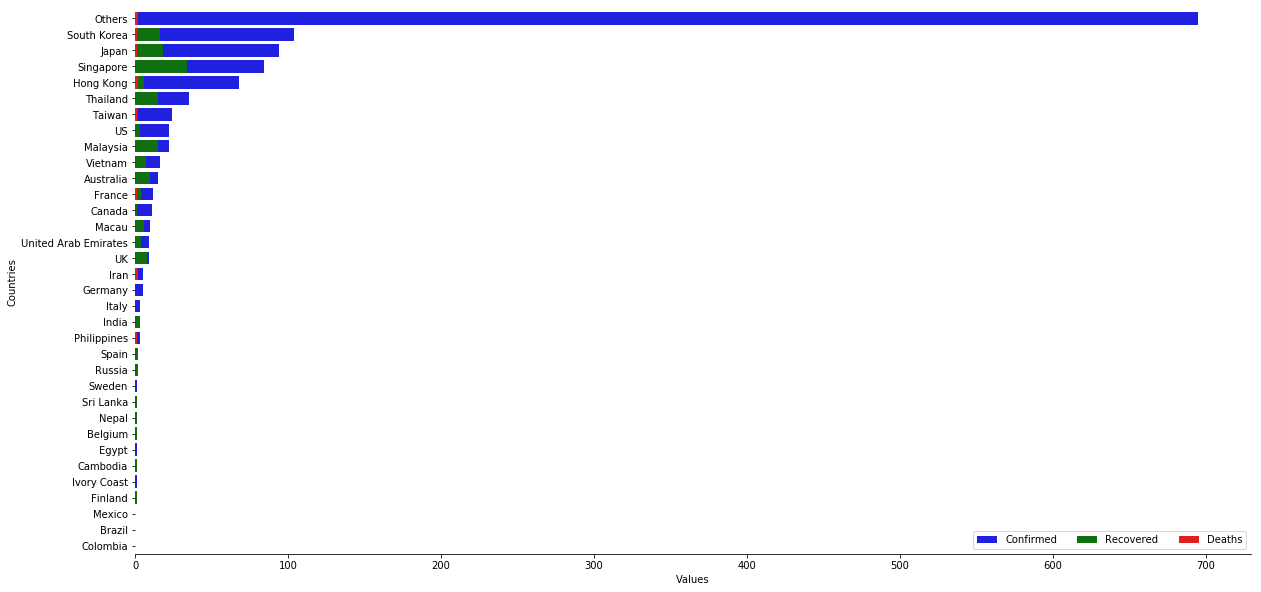

In [38]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x= recent_df_nc["Confirmed"], y= recent_df_nc.index, label="Confirmed", color="blue")
sns.barplot(x= recent_df_nc["Recovered"], y= recent_df_nc.index, label="Recovered", color="green")
sns.barplot(x= recent_df_nc["Deaths"], y= recent_df_nc.index, label="Deaths", color="red")
sns.despine(left= True)
ax.legend(ncol=5, loc="lower right")
ax.set(ylabel="Countries", xlabel="Values")

In [39]:
print('Globally, these are the total numbers reported yet: ')
recent_df.agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum', 'Recovery Rate': 'mean', 'Mortality Rate': 'mean'}).to_frame()

Globally, these are the total numbers reported yet: 


,0
Confirmed,76260.000000
Deaths,2247.000000
Recovered,18165.000000
Recovery Rate,0.443905
Mortality Rate,0.029397


In [40]:
recent_df.sort_values(['Confirmed'], ascending= False)

,Confirmed,Deaths,Mortality Rate,ObservationDate,Recovered,Recovery Rate
Country,,,,,,
China,74999.0,2236.0,0.029814,NaN,18002.0,0.240030
Others,695.0,2.0,0.002878,NaN,1.0,0.001439
South Korea,104.0,1.0,0.009615,2020-02-20,16.0,0.153846
Japan,94.0,1.0,0.010638,2020-02-20,18.0,0.191489
Singapore,84.0,0.0,0.000000,2020-02-20,34.0,0.404762
Hong Kong,68.0,2.0,0.029412,NaN,6.0,0.088235
Thailand,35.0,0.0,0.000000,2020-02-20,15.0,0.428571
Taiwan,24.0,1.0,0.041667,NaN,2.0,0.083333
US,22.0,0.0,0.000000,NaN,3.0,0.136364


In [41]:
recent_df.sort_values(['Mortality Rate'], ascending= False)

,Confirmed,Deaths,Mortality Rate,ObservationDate,Recovered,Recovery Rate
Country,,,,,,
Iran,5.0,2.0,0.400000,2020-02-20,0.0,0.000000
Philippines,3.0,1.0,0.333333,2020-02-20,1.0,0.333333
France,12.0,1.0,0.083333,2020-02-20,4.0,0.333333
Taiwan,24.0,1.0,0.041667,NaN,2.0,0.083333
China,74999.0,2236.0,0.029814,NaN,18002.0,0.240030
Hong Kong,68.0,2.0,0.029412,NaN,6.0,0.088235
Japan,94.0,1.0,0.010638,2020-02-20,18.0,0.191489
South Korea,104.0,1.0,0.009615,2020-02-20,16.0,0.153846
Others,695.0,2.0,0.002878,NaN,1.0,0.001439


In [42]:
recent_df.sort_values(['Recovery Rate'], ascending= True)

,Confirmed,Deaths,Mortality Rate,ObservationDate,Recovered,Recovery Rate
Country,,,,,,
Iran,5.0,2.0,0.400000,2020-02-20,0.0,0.000000
Egypt,1.0,0.0,0.000000,2020-02-20,0.0,0.000000
Sweden,1.0,0.0,0.000000,2020-02-20,0.0,0.000000
Italy,3.0,0.0,0.000000,2020-02-20,0.0,0.000000
Ivory Coast,1.0,0.0,0.000000,2020-01-27,0.0,0.000000
Germany,5.0,0.0,0.000000,NaN,0.0,0.000000
Others,695.0,2.0,0.002878,NaN,1.0,0.001439
Taiwan,24.0,1.0,0.041667,NaN,2.0,0.083333
Hong Kong,68.0,2.0,0.029412,NaN,6.0,0.088235


In [43]:
world_coordinates.head()

,Code,Country,latitude,longitude
0,AD,Andorra,42.546245,1.601554
1,AE,United Arab Emirates,23.424076,53.847818
2,AF,Afghanistan,33.939110,67.709953
3,AG,Antigua and Barbuda,17.060816,-61.796428
4,AI,Anguilla,18.220554,-63.068615


In [44]:
recent_df.head()

,Confirmed,Deaths,Mortality Rate,ObservationDate,Recovered,Recovery Rate
Country,,,,,,
Australia,15.0,0.0,0.000000,NaN,10.0,0.666667
Canada,11.0,0.0,0.000000,NaN,1.0,0.090909
China,74999.0,2236.0,0.029814,NaN,18002.0,0.240030
Germany,5.0,0.0,0.000000,NaN,0.0,0.000000
Hong Kong,68.0,2.0,0.029412,NaN,6.0,0.088235


In [45]:
world_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 4 columns):
Code         243 non-null object
Country      244 non-null object
latitude     244 non-null float64
longitude    244 non-null float64
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [46]:
recent_df.columns

Index(['Confirmed', 'Deaths', 'Mortality Rate', 'ObservationDate', 'Recovered',
       'Recovery Rate'],
      dtype='object')

In [47]:
recent_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, Australia to Vietnam
Data columns (total 6 columns):
Confirmed          35 non-null float64
Deaths             35 non-null float64
Mortality Rate     32 non-null float64
ObservationDate    26 non-null object
Recovered          35 non-null float64
Recovery Rate      32 non-null float64
dtypes: float64(5), object(1)
memory usage: 3.2+ KB


In [48]:
#recent_df= recent_df.join(world_coordinates, how= 'inner')
recent_df.drop(['Brazil', 'Mexico'], inplace= True)
recent_df

,Confirmed,Deaths,Mortality Rate,ObservationDate,Recovered,Recovery Rate
Country,,,,,,
Australia,15.0,0.0,0.000000,NaN,10.0,0.666667
Canada,11.0,0.0,0.000000,NaN,1.0,0.090909
China,74999.0,2236.0,0.029814,NaN,18002.0,0.240030
Germany,5.0,0.0,0.000000,NaN,0.0,0.000000
Hong Kong,68.0,2.0,0.029412,NaN,6.0,0.088235
Macau,10.0,0.0,0.000000,NaN,6.0,0.600000
Others,695.0,2.0,0.002878,NaN,1.0,0.001439
Taiwan,24.0,1.0,0.041667,NaN,2.0,0.083333
US,22.0,0.0,0.000000,NaN,3.0,0.136364


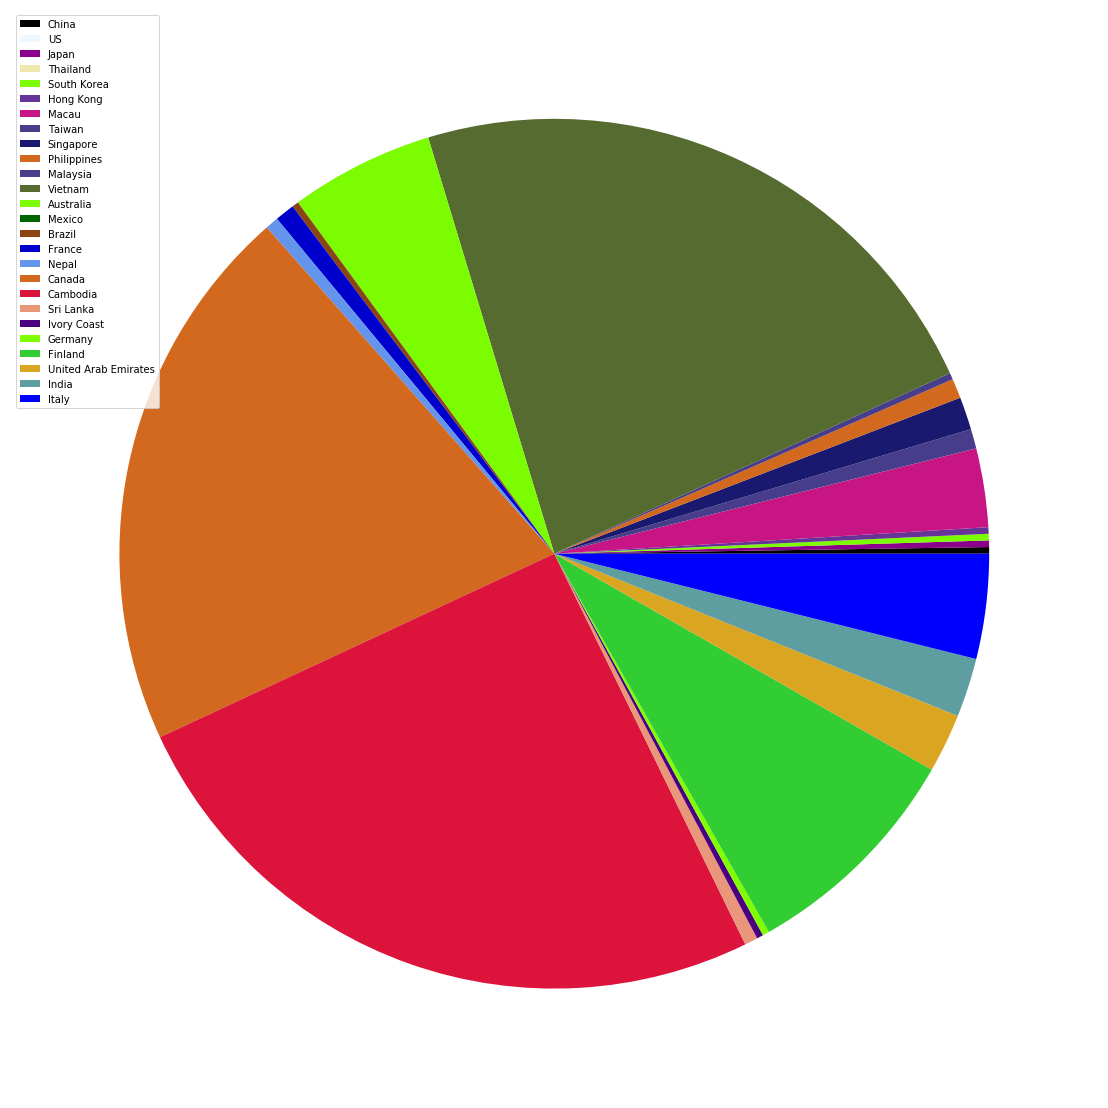

In [49]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(countries))
plt.figure(figsize=(20,20))
plt.pie(recent_c_df['Confirmed'], colors=c)
plt.legend(countries, loc='best')
plt.show()

In [50]:
world_map = folium.Map(location=[35.861660, 80.195397], zoom_start= 3, tiles='Stamen Toner')
outbreaks = folium.map.FeatureGroup()

for lt, ln, nm, cnfrm, rec, mor in zip(recent_df['latitude'], recent_df['longitude'], recent_df.index, recent_df['Confirmed'], recent_df['Recovery Rate'], recent_df['Mortality Rate']):
    ss= '<b>Country: </b>' + nm + '<br><b>#Confirmed: </b>' + str(int(cnfrm)) + '<br><b>Recovery rate: </b>' + str(round(rec, 2)) + '<br><b>Mortality rate: </b>' + str(round(mor, 2))
    folium.Marker([lt, ln], popup= ss).add_to(world_map) 
    folium.CircleMarker([lt, ln], radius= 0.05*int(cnfrm), color= 'red').add_to(world_map) 
    
world_map

KeyError: 'latitude'

In [51]:
fig = go.Figure()

fig.add_trace(go.Bar(
                x=NCOV_data["Country"],
                y=NCOV_data["Confirmed"],
                marker_color='darkorange',
                marker_line_color='rgb(8,48,107)',
                marker_line_width=2, 
                opacity=0.7))

fig.update_layout(
    title_text='Confirmed Cases on Provinces of China (Till February 17, 2020)',
    height=700, width=800, xaxis_title='Province/State', yaxis_title='Confirmed')

fig.show()

In [52]:
fig = go.Figure()

fig.add_trace(go.Bar(
                x=NCOV_data["Province/State"],
                y=NCOV_data["Recovered"],
                marker_color='mediumturquoise',
                name="Recovered"))

fig.add_trace(go.Bar(
                x=NCOV_data["Province/State"],
                y=NCOV_data["Deaths"],
                marker_color='red',
                name="Deaths"))

fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=2, opacity=0.7)

fig.update_layout(
    title_text='Death/Recovered Rate in the Other China Provinces Except Wuhan',
    height=600, width=800, xaxis_title='Province/State')

fig.show()

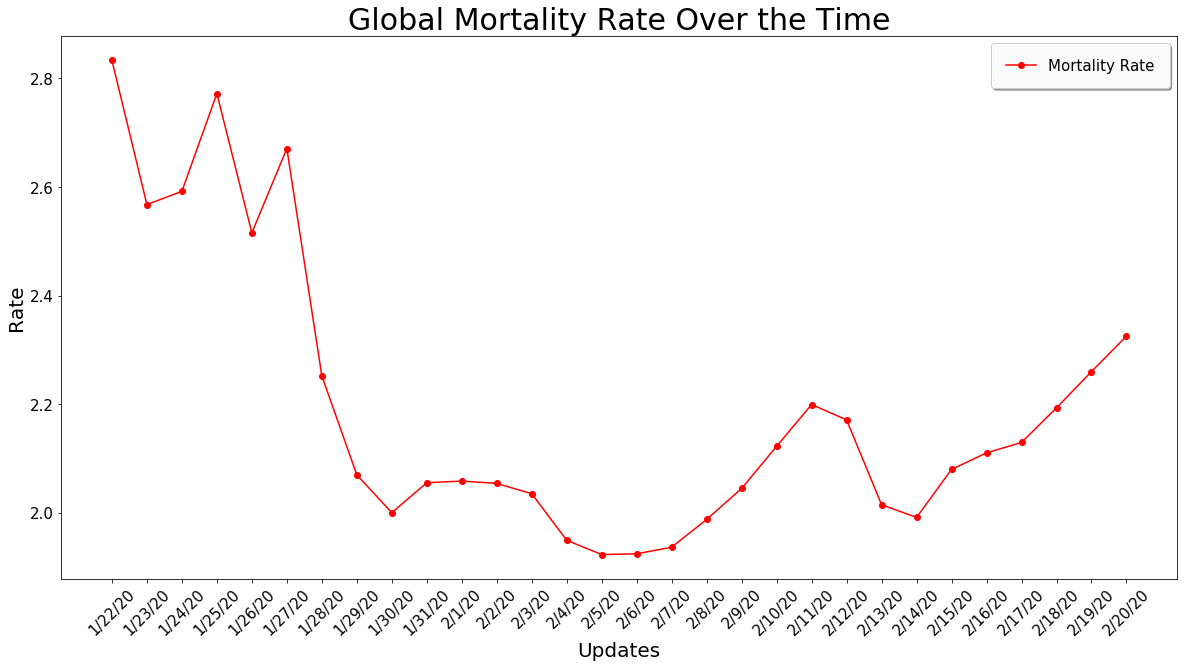

In [53]:

time_series_covid_19_confirmed = np.sum(time_series_covid_19_confirmed.iloc[:,4:time_series_covid_19_confirmed.shape[1]])
time_series_covid_19_recovered = np.sum(time_series_covid_19_recovered.iloc[:,4:time_series_covid_19_recovered.shape[1]])
time_series_covid_19_deaths = np.sum(time_series_covid_19_deaths.iloc[:,4:time_series_covid_19_deaths.shape[1]])

global_mortality = time_series_covid_19_deaths/(time_series_covid_19_confirmed+time_series_covid_19_recovered+time_series_covid_19_deaths)*100

# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot for each case variable(suspected, recovered and death)
plt.plot(global_mortality
        , color = 'red'
        , label = 'Mortality Rate'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Global Mortality Rate Over the Time',size=30)
plt.ylabel('Rate',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper right"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);


In [54]:
confirmed = time_series_covid_19_confirmed 
confirmed.head()

1/22/20     555
1/23/20     653
1/24/20     941
1/25/20    1434
1/26/20    2118
dtype: int64

In [55]:
# taking cases numbers
Hubei = china_cases[china_cases.index=="Hubei"]
Hubei = Hubei.iloc[0]

# difyning plot size
plt.figure(figsize=(15,15))

# here i use .value_counts() to count the frequency that each category occurs of dataset
Hubei.plot(kind='pie'
           , colors=['#4b8bbe','lime','red']
           , autopct='%1.1f%%' # adding percentagens
           , shadow=True
           , startangle=140)

# defyning titles and legend parameters
plt.title('Hubei Cases Distribution',size=30)
plt.legend(loc = "upper right"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

NameError: name 'china_cases' is not defined